# Giới thiệu chung

Sự ra đời của cơ chế Attention (Attention Mechanism) trong học sâu đã mang lại hiệu quả đáng kể cho nhiều mô hình, nó đã và đang tiếp tục là một thành phần không thể thiếu trong các mô hình tiến tiến nhất. Vì lí do đó để làm việc và áp dụng hiểu quả cơ chế này, việc hiểu và "pay attention" đến cơ chế attention là điều vô cùng quan trọng.

Trước khi đi vào cơ chế attention thì chúng ta cần tìm hiểu tại sao cơ chế này lại ra đời, cụ thể hơn là trong bài toán dịch máy (NMT). Ta thường sử dụng mô hình seq2seq với hai thành phần là khối encoder và decoder, với nhiệm vụ từ một chuỗi ban đầu ở ngôn ngữ này tạo ra chuỗi đích ở ngôn ngữ khác. Hai khối này đều được tạo thành từ các lớp RNN. Khối Encoder sẽ xử lí thông tin đầu vào và đầu ra là một vector biểu diễn duy nhất, hay còn gọi quá trình này là nén thông tin. Vector biểu diễn này sẽ mang toàn bộ thông tin để khối Decoder có thể tạo ra câu đích. Thực tế, mô hình seq2seq bới kiến trúc từ RNN hoạt động rất tốt đối với các chuỗi có đồ dài ngắn, khi độ dài chuỗi tăng thì chất lượng của mô hình sẽ giảm đáng kể

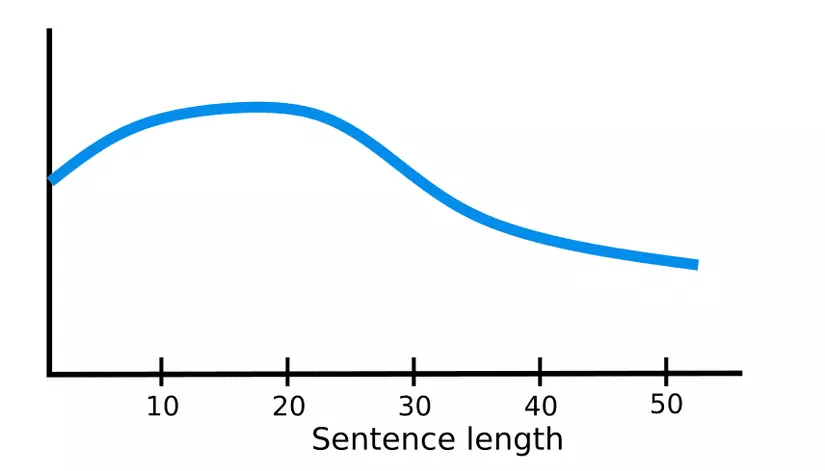

Lí do là bởi đối với chuỗi dài thì RNN gặp phải 2 vấn đề là hiện tượng tiêu biến gradient (vanishing gradient) và bùng nổ gradient (exploding gradient). LSTM mặc dù đã được ra đời từ rất lâu nhưng lại có thể khắc phục được nhược điểm của RNN. Mặc dù vậy, đúng như định lý Murphy

"Mọi giải pháp đều tạo nên vấn đề mới" 🤣

Việc sử dụng LSTM có những hạn chế sau:

Khó huấn luyện, thời gian huấn luyện lâu do gradient path rất dài (chuỗi 100 từ có gradient như là mạng 100 lớp)
Transfer learning không hoạt động với LSTM, điều đồng nghĩa với một bài toán mới thì ta cần huần luyện lại mô hình với bộ dữ liệu riêng biệt cho nhiệm vụ đề ra (tốn kém)
Quay lại mô hình seq2seq với RNN thì như vậy, encoder sẽ phải "nén" toàn bộ chuỗi đầu vào thành một vector duy nhất - việc này rất khó, khi mà chuỗi đủ dài và encoder buộc phải đưa toàn bộ thông tin vào 1 vector biểu diễn duy nhất này thì chắc chắn nó sẽ "quên" thông tin nào đó (bottleneck)! Ngoài ra, decoder chỉ nhìn thấy một vector biểu diễn đầu vào duy nhất, mặc dù tại mỗi time-step thì các phần khác nhau của chuỗi vào có thể có ích hơn các phần khác. Nhưng đối với mô hình hiện tại thì decoder sẽ phải trích các thông tin liên quan này từ một vector biểu diễn duy nhất - việc này cũng vô cùng khó.

Attention đã được ra đời vào năm 2015 Bahdanau2015 với mục đích giải quyết vấn đề kể trên. Với cơ chế này, tại mỗi time-step khác nhau, mô hinh sẽ tập trung vào các phần khác nhau của đầu vào.

# Cơ chế Attention cho mô hình seq2seq

Như vậy cơ chế attention được ra đời để giải quyết các vấn đề của mô hình seq2seq (transformer và cơ chế attention ra đời để thay cho seq2seq không cần đến các mạng nơ-ron hồi tiếp) , với ý tưởng sử dụng một vector bối cảnh có thể tương tác với toàn bộ vector trạng thái ẩn của encoder thay vì chỉ sử dụng vector trạng thái ẩn cuối cùng để tạo ra vector biểu diễn cho decoder. Cụ thể hơn, mô hình seq2seq khi áp dụng cơ chế attention vào sẽ có cấu trúc như sau (các khối màu xanh dương là encoder, màu đỏ là decoder):

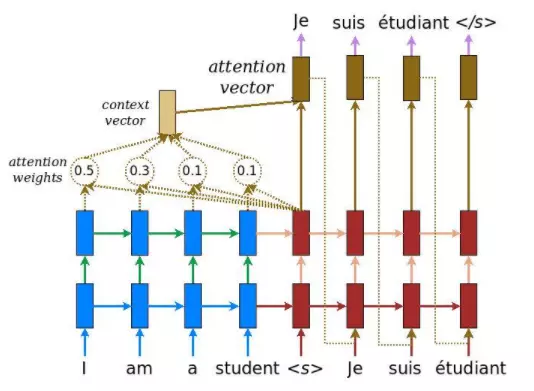

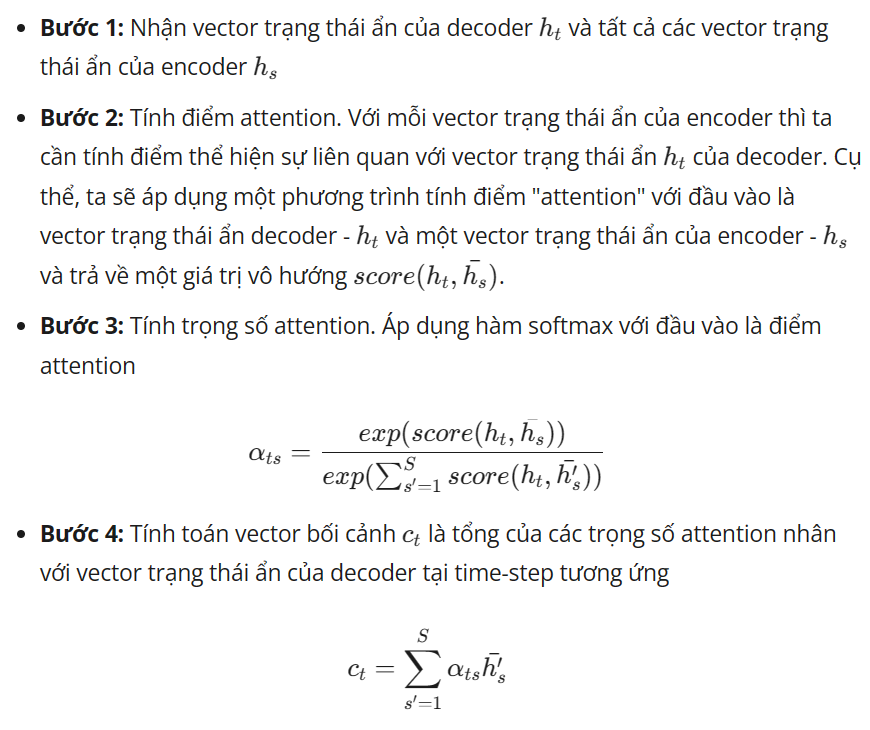

In [ ]:
# We not have code yet